# Image Classification using CNN

The goal of this project is to create a live produce detection that would detect if the produce from the market was rotten (mould, discoloured) or fresh.

This CNN was built using transfer learning and the Keras Tensorflow Library.

The Data for this classification problem was taken from google images by performing a simple image search and using a chrome extension called 'image downloader' to automatically detect images on the web page displayed to enable download.



## Install Gradio for creating the image classification GUI

In [1]:
!pip install gradio

     |████████████████████████████████| 871 kB 5.1 MB/s 
     |████████████████████████████████| 52 kB 722 kB/s 
     |████████████████████████████████| 210 kB 48.5 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 2.0 MB 31.1 MB/s 
     |████████████████████████████████| 1.1 MB 35.6 MB/s 
     |████████████████████████████████| 94 kB 2.2 MB/s 
     |████████████████████████████████| 271 kB 40.8 MB/s 
     |████████████████████████████████| 144 kB 38.6 MB/s 
     |████████████████████████████████| 58 kB 1.8 MB/s 
     |████████████████████████████████| 10.9 MB 32.2 MB/s 
     |████████████████████████████████| 79 kB 4.6 MB/s 
     |████████████████████████████████| 856 kB 32.7 MB/s 
     |████████████████████████████████| 3.6 MB 34.5 MB/s 
     |████████████████████████████████| 61 kB 376 kB/s 
     |████████████████████████████████| 58 kB 4.9 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=8b6a

## Import and Download Dataset


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [3]:
import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['data.zip']), "r")
zf.extractall()

## Data Preparation

In [4]:
train_dir = '/content/data/train_data'
test_dir = '/content/data/test_data'

In [5]:
import os

In [6]:
#Train dataset
fresh_apples_train_dir = os.path.join(train_dir, 'fresh_apples')
fresh_bananas_train_dir = os.path.join(train_dir, 'fresh_bananas')
fresh_tomatoes_train_dir = os.path.join(train_dir, 'fresh_tomatoes')

rotten_apples_train_dir = os.path.join(train_dir, 'rotten_apples')
rotten_bananas_train_dir = os.path.join(train_dir, 'rotten_bananas')
rotten_tomatoes_train_dir = os.path.join(train_dir, 'rotten_tomatoes')

In [7]:
#Test dataset
fresh_apples_test_dir = os.path.join(test_dir, 'fresh_apples_test')
fresh_bananas_test_dir = os.path.join(test_dir, 'fresh_bananas_test')
fresh_tomatoes_test_dir = os.path.join(test_dir, 'fresh_tomatoes_test')

rotten_apples_test_dir = os.path.join(test_dir, 'rotten_apples_test')
rotten_bananas_test_dir = os.path.join(test_dir, 'rotten_bananas_test')
rotten_tomatoes_test_dir = os.path.join(test_dir, 'rotten_tomatoes_test')

In [8]:
train_freshapples_filenames = os.listdir(fresh_apples_train_dir)
train_freshbananas_filenames = os.listdir(fresh_bananas_train_dir)
train_freshtomatoes_filenames = os.listdir(fresh_tomatoes_train_dir)
train_rottenapples_filenames = os.listdir(rotten_apples_train_dir)
train_rottenbananas_filenames = os.listdir(rotten_bananas_train_dir)
train_rottentomatoes_filenames = os.listdir(rotten_tomatoes_train_dir)

test_freshapples_filenames = os.listdir(fresh_apples_test_dir)
test_freshbananas_filenames = os.listdir(fresh_bananas_test_dir)
test_freshtomatoes_filenames = os.listdir(fresh_tomatoes_test_dir)
test_rottenapples_filenames = os.listdir(rotten_apples_test_dir)
test_rottenbananas_filenames = os.listdir(rotten_bananas_test_dir)
test_rottentomatoes_filenames = os.listdir(rotten_tomatoes_test_dir)

In [9]:
print("Number of training fresh apple image : ", len(train_freshapples_filenames))
print("Number of training fresh bananas image : ", len(train_freshbananas_filenames))
print("Number of training fresh tomatoes image : ", len(train_freshtomatoes_filenames))
print("Number of training rotten apple image : ", len(train_rottenapples_filenames))
print("Number of training rotten bananas image : ", len(train_rottenbananas_filenames))
print("Number of training rotten tomatoes image : ", len(train_rottentomatoes_filenames))

print("Number of test fresh apple image : ", len(test_freshapples_filenames))
print("Number of test fresh bananas image : ", len(test_freshbananas_filenames))
print("Number of test fresh tomatoes image : ", len(test_freshtomatoes_filenames))
print("Number of test rotten apple image : ", len(test_rottenapples_filenames))
print("Number of test rotten bananas image : ", len(test_rottenbananas_filenames))
print("Number of test rotten tomatoes image : ", len(test_rottentomatoes_filenames))

Number of training fresh apple image :  145
Number of training fresh bananas image :  124
Number of training fresh tomatoes image :  103
Number of training rotten apple image :  126
Number of training rotten bananas image :  291
Number of training rotten tomatoes image :  134
Number of test fresh apple image :  16
Number of test fresh bananas image :  14
Number of test fresh tomatoes image :  12
Number of test rotten apple image :  14
Number of test rotten bananas image :  33
Number of test rotten tomatoes image :  16


## View Some Images

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Parameter graph
n_rows = 4
n_cols = 4
iterating_index = 0

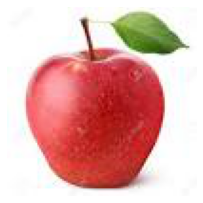

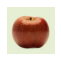

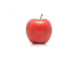

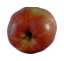

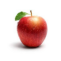

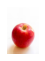

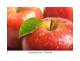

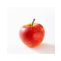

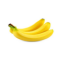

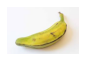

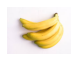

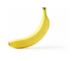

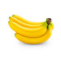

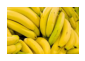

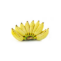

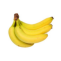

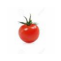

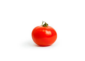

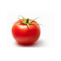

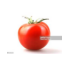

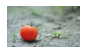

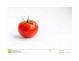

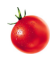

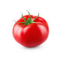

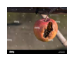

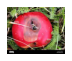

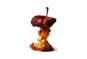

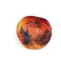

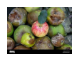

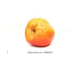

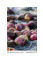

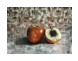

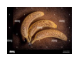

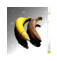

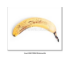

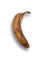

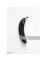

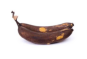

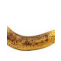

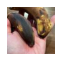

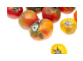

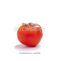

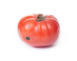

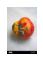

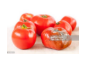

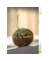

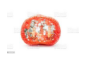

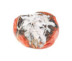

In [11]:
fig = plt.gcf()
fig.set_size_inches(n_cols*4, n_rows*4)

iterating_index += 8

freshapples_pix = [os.path.join(fresh_apples_train_dir, fname) 
                for fname in train_freshapples_filenames[iterating_index-8:iterating_index] 
               ]

freshbananas_pix = [os.path.join(fresh_bananas_train_dir, fname) 
                for fname in train_freshbananas_filenames[iterating_index-8:iterating_index] 
               ]

freshtomatoes_pix = [os.path.join(fresh_tomatoes_train_dir, fname) 
                for fname in train_freshtomatoes_filenames[iterating_index-8:iterating_index] 
               ]

rottenapples_pix = [os.path.join(rotten_apples_train_dir, fname) 
                for fname in train_rottenapples_filenames[iterating_index-8:iterating_index] 
               ]

rottenbananas_pix = [os.path.join(rotten_bananas_train_dir, fname) 
                for fname in train_rottenbananas_filenames[iterating_index-8:iterating_index] 
               ]

rottentomatoes_pix = [os.path.join(rotten_tomatoes_train_dir, fname) 
                for fname in train_rottentomatoes_filenames[iterating_index-8:iterating_index] 
               ]
enum1 = freshapples_pix + freshbananas_pix
enum2 = freshtomatoes_pix + rottenapples_pix
enum3 = rottenbananas_pix + rottentomatoes_pix
def showImage(enum):
  for i, img_path in enumerate(enum):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(n_rows, n_cols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

showImage(enum1)
showImage(enum2)
showImage(enum3)

## Data Preprocessing

There are two ImageDataGenerators, one for the training dataset and one for our testing dataset. The purposes of these generators are to perform data augmentations, which will then be fed into our CNN.
Batch size refers to the number of items from the dataset our model is fed.

The data is rescaled to normalize our inputs and transform every pixel in the range 0,255 to 0, 1.

For our train_batches, we will apply a horizontal flip, but we will not do this for our testing data to ensure the data is completely new in a sense.

Next, data is fed to the data generator. We do so with flow_from_directory, which allows us to load all the data from folder. We specify the folder where our training data is located as well as batch size and class_mode. We will use categorical for our class mode because we have data that falls into one of many categories. In this case, we are classifying fruits, but there are six categories that the data can fall under. Then, target_size is set to (150, 150).

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                )

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=10,
                    class_mode='categorical'
                )

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150,150),
                    batch_size=10,
                    class_mode='categorical'
                )

Found 923 images belonging to 6 classes.
Found 105 images belonging to 6 classes.


## Building the Model

Keras allows us to Sequential() which allows the addition of layers to our neural network.

We will add a Convolutional layer as our first layer to our CNN. The 32 references the amount of filters being placed on the image, (3,3) is our filter size, and we are using a relu activation. 3 in the input shape references RGB since those are the channels our image has. After the Conv2D layer, we will add a MaxPooling2D layer that will have a pool size of 2, 2.

Now we will need to add another Conv2D layer but this time having 64 filters with a size of (3,3), continuing with the relu activation. We will also add another MaxPooling2D layer that will have a pool size of 2, 2.

Then the dense layers. We need to flatten our input using the Flatten function. The last layer of our CNN will have 6 neurons, and an activation of softmax.



In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import callbacks

In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [15]:
#model.summary()


Now we can compile and evaluate our model. We will use RMSprop as our optimizer, and categorical cross entropy for our loss function. This loss function is used because we have multi-class classification tasks. We will measure accuracy and fit the model to evaluate how well our network can perform on test batches.

In [16]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

## Training the Dataset

In [19]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    steps_per_epoch=10,
                    epochs=20,
                    validation_steps=5,
                    verbose=2    )

Epoch 1/20
10/10 - 2s - loss: 1.2998 - acc: 0.4800 - val_loss: 1.2364 - val_acc: 0.5200 - 2s/epoch - 182ms/step
Epoch 2/20
10/10 - 2s - loss: 0.9667 - acc: 0.6100 - val_loss: 1.1967 - val_acc: 0.5200 - 2s/epoch - 183ms/step
Epoch 3/20
10/10 - 2s - loss: 1.3093 - acc: 0.5376 - val_loss: 0.8178 - val_acc: 0.6600 - 2s/epoch - 200ms/step
Epoch 4/20
10/10 - 2s - loss: 1.1016 - acc: 0.5484 - val_loss: 1.0886 - val_acc: 0.5800 - 2s/epoch - 166ms/step
Epoch 5/20
10/10 - 2s - loss: 1.1501 - acc: 0.5900 - val_loss: 0.9500 - val_acc: 0.6000 - 2s/epoch - 184ms/step
Epoch 6/20
10/10 - 2s - loss: 1.0584 - acc: 0.5700 - val_loss: 0.6918 - val_acc: 0.8400 - 2s/epoch - 188ms/step
Epoch 7/20
10/10 - 2s - loss: 1.1742 - acc: 0.6200 - val_loss: 0.8532 - val_acc: 0.5800 - 2s/epoch - 172ms/step
Epoch 8/20
10/10 - 2s - loss: 0.9462 - acc: 0.6100 - val_loss: 0.8688 - val_acc: 0.7000 - 2s/epoch - 151ms/step
Epoch 9/20
10/10 - 2s - loss: 1.1122 - acc: 0.5900 - val_loss: 0.9296 - val_acc: 0.6200 - 2s/epoch - 158

## Evaluate Accuracy and Loss

Text(0.5, 1.0, 'Training and validation loss')

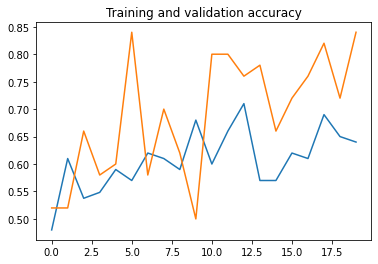

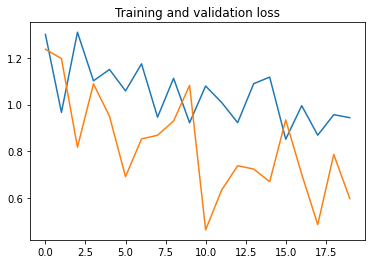

In [20]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [21]:
result = model.evaluate_generator(test_generator, 5)
print('Accuracy of this model : ', result[1])

Accuracy of this model :  0.8199999928474426


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


## Run the Model

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  img = image.load_img(fn, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if classes[0][0]==1:
    prediction = 'fresh apple'
  elif classes[0][1]==1:
    prediction = 'fresh banana'
  elif classes[0][2]==1:
    prediction = 'fresh tomato'
  elif classes[0][3]==1:
    prediction = 'rotten apple'
  elif classes[0][4]==1:
    prediction = 'rotten banana'
  elif classes[0][5]==1:
    prediction = 'rotten tomato'
print('{} is a {}'.format(fn,prediction))

Saving download (13).jpg to download (13).jpg
download (13).jpg is a rotten tomato


## Save the Model

In [23]:
import tensorflow as tf

model_version = "1"
model_name = "qualitycheck-model"
model_path = os.path.join(model_name, model_version)
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: qualitycheck-model/1/assets


In [24]:
model.save("qualitycheck-model.h5")

In [25]:
import shutil

shutil.make_archive('qualitycheck-model', 'zip', 'qualitycheck-model')


'/content/qualitycheck-model.zip'

## Build GUI

In [26]:
import gradio
import gradio as gr

In [27]:
#create a function to make predictions
def fresh_or_rotten(img):
    img = img.reshape((1, 150, 150, 3))
    prediction = model.predict(img).tolist()[0] 
    class_names = ["fresh apple", "fresh banana", "fresh tomato", "rotten apple", "rotten banana", "rotten tomato"]
    return {class_names[i]: prediction[i] for i in range(6)}
#set the user uploaded image as the input array
#match same shape as the input shape in the model
im = gradio.inputs.Image(shape=(150, 150), source="upload")
#setup the interface
iface = gr.Interface(
    fn = fresh_or_rotten, 
    inputs = im, 
    outputs = gradio.outputs.Label(),
)
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://55348.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f7190e32550>,
 'http://127.0.0.1:7860/',
 'https://55348.gradio.app')